<a href="https://colab.research.google.com/github/krinapatel1211/Pytorch_Tutorial/blob/main/pytorch_workflows.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
import torch
from torch import nn # all pytorh building blocks of neural network
import matplotlib.pyplot as plt

torch.__version__

'2.1.0+cu121'

In [68]:
weight = 0.9
bias = 0.5

start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.5000],
         [0.5180],
         [0.5360],
         [0.5540],
         [0.5720],
         [0.5900],
         [0.6080],
         [0.6260],
         [0.6440],
         [0.6620]]))

In [69]:
X.shape, y.shape

(torch.Size([50, 1]), torch.Size([50, 1]))

In [70]:
train_split = int(0.8*len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [71]:
X_train

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800],
        [0.2000],
        [0.2200],
        [0.2400],
        [0.2600],
        [0.2800],
        [0.3000],
        [0.3200],
        [0.3400],
        [0.3600],
        [0.3800],
        [0.4000],
        [0.4200],
        [0.4400],
        [0.4600],
        [0.4800],
        [0.5000],
        [0.5200],
        [0.5400],
        [0.5600],
        [0.5800],
        [0.6000],
        [0.6200],
        [0.6400],
        [0.6600],
        [0.6800],
        [0.7000],
        [0.7200],
        [0.7400],
        [0.7600],
        [0.7800]])

In [72]:
def plot_predictions(train_data=X_train,
                     train_label=y_train,
                     test_data=X_test,
                     test_label=y_test,
                     predictions=None):

    plt.figure(figsize=(7,4))
    plt.scatter(train_data, train_label, c="b", s=4, label="Training data")
    plt.scatter(test_data, test_label, c="g", s=4, label="Testing data")

    if predictions is not None:
      plt.scatter(test_data, predictions, c="r", s=4, label='Predictions')
    plt.legend(prop={"size":14})


In [73]:

class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch is a nn.Module (think of this as neural network lego blocks)
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, # <- start with random weights (this will get adjusted as the model learns)
                                                dtype=torch.float), # <- PyTorch loves float32 by default
                                   requires_grad=True) # <- can we update this value with gradient descent?)

        self.bias = nn.Parameter(torch.randn(1, # <- start with random bias (this will get adjusted as the model learns)
                                            dtype=torch.float), # <- PyTorch loves float32 by default
                                requires_grad=True) # <- can we update this value with gradient descent?))

    # Forward defines the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data (e.g. training/testing features)
        return self.weights * x + self.bias # <- this is the linear regression formula (y = m*x + b)

In [74]:
## checking the contents of our Model

RANDOM_SEED = 42
torch.manual_seed(seed=RANDOM_SEED)

model_0 = LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [75]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [76]:
weight, bias

(0.9, 0.5)

In [77]:
## Making Predictions using `torch.inference_mode()

with torch.inference_mode():
    y_preds = model_0(X_test)

# Note: in older PyTorch code you might also see torch.no_grad()
# with torch.no_grad():
#   y_preds = model_0(X_test)

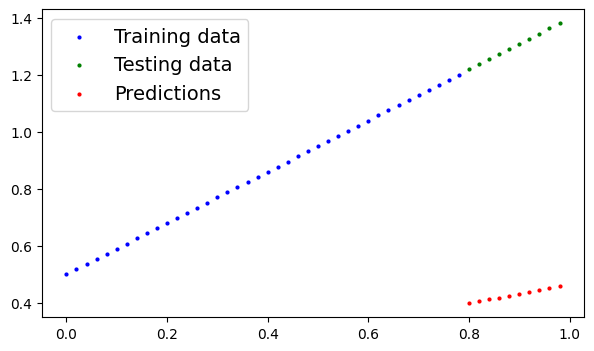

In [78]:
plot_predictions(predictions=y_preds)

In [79]:
# Train Model

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [80]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [81]:
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)

In [82]:
with torch.inference_mode():
    list(model_0.parameters())

In [83]:
epochs = 150
epoch_count = []
loss_count = []
test_loss_count = []

# 0. Loop through the data
for epoch in range(epochs):
    # set all parameters that requires gradient
    model_0.train()
    # 1. Forward pass
    y_pred = model_0(X_train)

    # 2. Calculate the  loss
    loss = loss_fn(y_pred, y_train)

    # 3. Optimizer zero-grad
    optimizer.zero_grad()

    # 4. perform backpropogation
    loss.backward()

    # 5. perform gradient descrent (step the optimizer)
    optimizer.step()

    model_0.eval() # turns off gradient descent and diferentsettings not needed for evaluations
    with torch.inference_mode():
        test_pred = model_0(X_test)

        test_loss = loss_fn(test_pred, y_test)

    if epoch%20 == 0:
        epoch_count.append(epoch)
        loss_count.append(loss)
        test_loss_count.append(test_loss)






        print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")



Epoch: 0 | Loss: 0.59088134765625 | Test Loss: 0.8590651750564575
Epoch: 20 | Loss: 0.36046138405799866 | Test Loss: 0.5896453261375427
Epoch: 40 | Loss: 0.13537496328353882 | Test Loss: 0.3248145878314972
Epoch: 60 | Loss: 0.06989312916994095 | Test Loss: 0.18714836239814758
Epoch: 80 | Loss: 0.060011692345142365 | Test Loss: 0.14494657516479492
Epoch: 100 | Loss: 0.05303166061639786 | Test Loss: 0.12290702760219574
Epoch: 120 | Loss: 0.04616682603955269 | Test Loss: 0.10704914480447769
Epoch: 140 | Loss: 0.039301007986068726 | Test Loss: 0.09119126945734024


In [84]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.7215])), ('bias', tensor([0.5748]))])

In [85]:
with torch.inference_mode():
    y_preds_new = model_0(X_test)

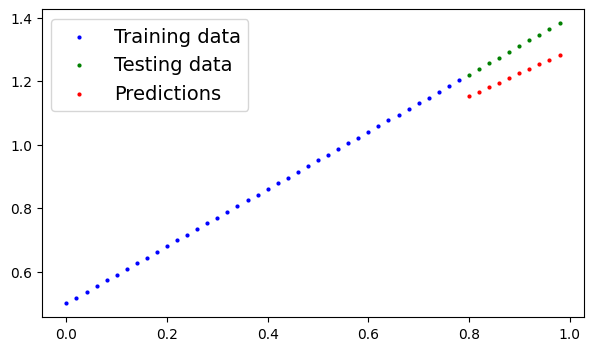

In [86]:
plot_predictions(predictions=y_preds_new)

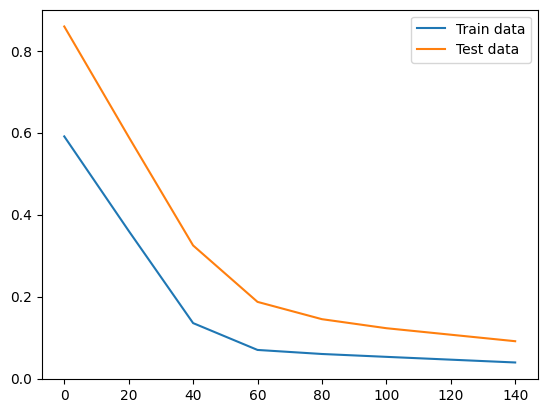

In [87]:
import numpy as np
plt.plot(epoch_count, np.array(torch.tensor(loss_count).numpy()), label="Train data")
plt.plot(epoch_count, np.array(torch.tensor(test_loss_count).numpy()), label="Test data")
plt.legend()



### Save a model in PyTorch



In [88]:
# Method 1. troch.save()

from pathlib import Path

# 1. Create model directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = '01_pytorch_workflow_model_0.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. save the model
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

### Loading saved Model

In [89]:
## loading a PYtorch model

loaded_model_0 = LinearRegressionModel()

loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [90]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.7215])), ('bias', tensor([0.5748]))])

In [91]:
loaded_model_0.eval()

with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[1.1520],
        [1.1665],
        [1.1809],
        [1.1953],
        [1.2098],
        [1.2242],
        [1.2386],
        [1.2531],
        [1.2675],
        [1.2819]])

In [92]:
y_preds_new

tensor([[1.1520],
        [1.1665],
        [1.1809],
        [1.1953],
        [1.2098],
        [1.2242],
        [1.2386],
        [1.2531],
        [1.2675],
        [1.2819]])

In [181]:
import torch
from torch import nn
import matplotlib.pyplot as plt


torch.__version__



'2.1.0+cu121'

In [182]:
device = 'cuda' if torch.cuda.is_available() else "cpu"
device


'cpu'

In [183]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight*X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [184]:
train_split = int(0.8
                  *len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]


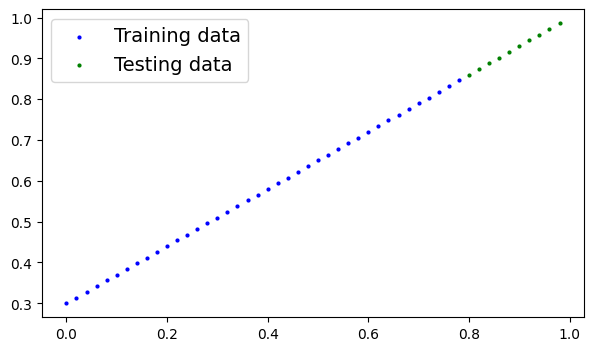

In [185]:
plot_predictions(X_train, y_train, X_test, y_test)

In [186]:
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Linear(in_features=1,
                                      out_features=1)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)


torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()




(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [187]:
next(model_1.parameters()).device


device(type='cpu')

In [188]:
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.001)




In [189]:
torch.manual_seed(42)

epochs=300

X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)


for epoch in range(epochs):
    model_1.train()

    y_pred = model_1(X_train)

    loss = loss_fn(y_pred, y_train)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    model_1.eval()
    with torch.inference_mode():
        test_pred = model_1(X_test)

        test_loss = loss_fn(test_pred, y_test)

    if epoch%10 == 0:
        print(f"Epochs: {epoch}, Loss: {loss}, Test loss: {test_loss}")



Epochs: 0, Loss: 0.5551779866218567, Test loss: 0.5861000418663025
Epochs: 10, Loss: 0.543657124042511, Test loss: 0.5726292729377747
Epochs: 20, Loss: 0.5321362614631653, Test loss: 0.559158444404602
Epochs: 30, Loss: 0.5206153988838196, Test loss: 0.5456877946853638
Epochs: 40, Loss: 0.5090945363044739, Test loss: 0.5322169065475464
Epochs: 50, Loss: 0.4975736737251282, Test loss: 0.518746018409729
Epochs: 60, Loss: 0.48605290055274963, Test loss: 0.505275309085846
Epochs: 70, Loss: 0.47453203797340393, Test loss: 0.49180442094802856
Epochs: 80, Loss: 0.4630111753940582, Test loss: 0.47833362221717834
Epochs: 90, Loss: 0.4514903128147125, Test loss: 0.4648628234863281
Epochs: 100, Loss: 0.4399694502353668, Test loss: 0.4513920247554779
Epochs: 110, Loss: 0.4284486174583435, Test loss: 0.4379211962223053
Epochs: 120, Loss: 0.4169277548789978, Test loss: 0.4244503974914551
Epochs: 130, Loss: 0.4054069519042969, Test loss: 0.41097956895828247
Epochs: 140, Loss: 0.39388611912727356, Test

In [190]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6999]])),
             ('linear_layer.bias', tensor([0.3008]))])

In [191]:
model_1.eval()

with torch.inference_mode():
    y_pred = model_1(X_test)

y_pred

tensor([[0.8607],
        [0.8747],
        [0.8887],
        [0.9027],
        [0.9167],
        [0.9307],
        [0.9447],
        [0.9587],
        [0.9727],
        [0.9867]])

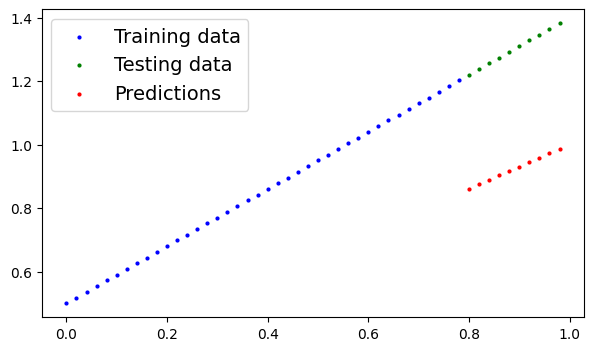

In [193]:
plot_predictions(predictions=y_pred)

In [196]:
from pathlib import Path

model_path = Path("models")
model_path.mkdir(parents=True, exist_ok=True)

model_name = "01_python_workflow_model_1.pth"
model_save_path = model_path / model_name

torch.save(obj=model_1.state_dict(),
           f=model_save_path)


In [194]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6999]])),
             ('linear_layer.bias', tensor([0.3008]))])

In [197]:
loaded_model_1 = LinearRegressionModelV2()

loaded_model_1.load_state_dict(torch.load(model_save_path))

loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6999]])),
             ('linear_layer.bias', tensor([0.3008]))])